In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([ [ ((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

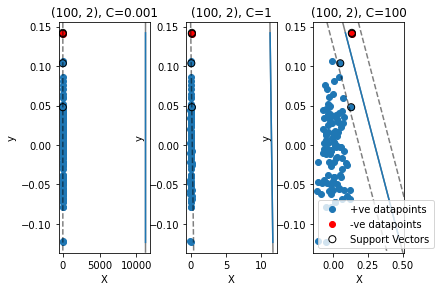

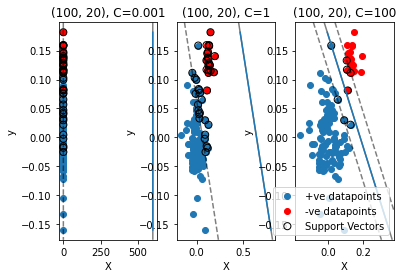

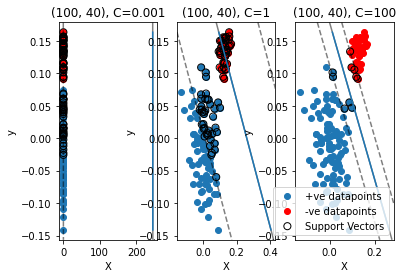

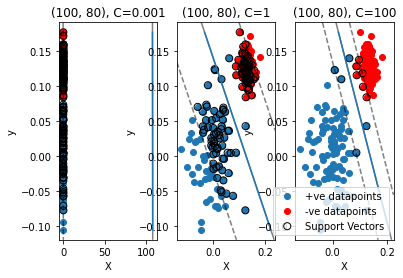

In [4]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
reg_strength = [0.001, 1, 100]
fig = plt.figure()

for j,i in enumerate(ratios):
    
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    count = 0
    
    for c in reg_strength:
      
      plt.subplot(1, 3, count+1)
      count += 1

      plt.scatter(X_p[:,0],X_p[:,1], label="+ve datapoints")
      plt.scatter(X_n[:,0],X_n[:,1],color='red', label="-ve datapoints")
     
      clf = SVC(C=c, kernel='linear')
      clf.fit(X, y)

      draw_line(clf.coef_[0], clf.intercept_, mi=min(X[:, 1]), ma=max(X[:, 1]))

      #draw_line(clf.coef_[0], clf.intercept_, y.min(), y.max())
      plt.title(str(i)+", C="+str(c))
      
      # plot support vectors  
      plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 50, facecolors="none", edgecolors="k", label="Support Vectors")
      
      
      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      # create grid to evaluate model
      xx = np.linspace(xlim[0], xlim[1], 30)
      yy = np.linspace(ylim[0], ylim[1], 30)
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      Z = clf.decision_function(xy).reshape(XX.shape)

      # plot decision boundary and margins
      ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
      fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
      
      plt.xlabel("X")
      plt.ylabel("y")
    
    plt.legend()  
    plt.show()
    

In SVM we are looking for a hyperplane that classify as many datapoints correctly as possible and that hyperplane should  be maximising the minimum geometric margin. 

The parameter C determines how great our wish is to separates as much correctly as possible. 

**If c is low** -> it gives large minimum margin, it might be possible that we neglect some datapoints that have failed to classify correctly. Example when C=0.001, margin is very large and most of the data points are not correctly classified by decision boundry (line/plane/hyperplane) 


**If c is high** -> means we can’t neglect most of the points and end up with smaller margin. For example, when C=100 most of the data points classified correctly and margin is very low.  

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

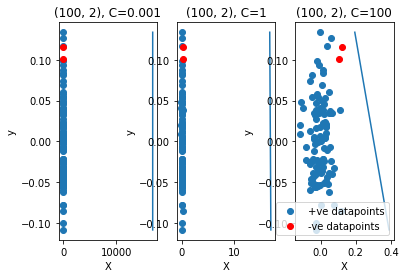

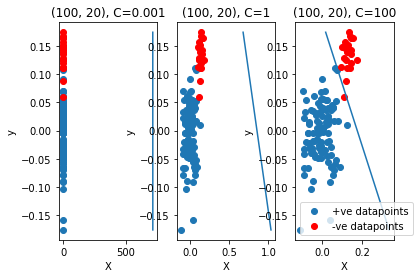

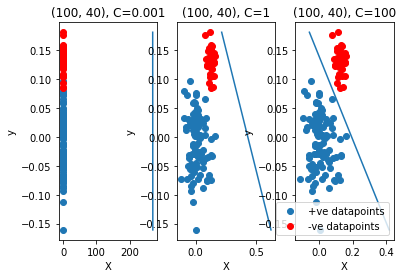

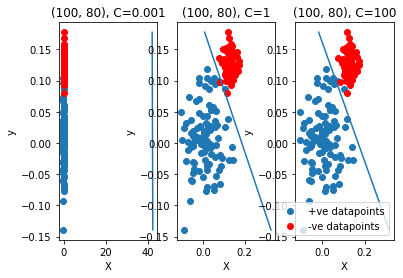

In [6]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
reg_strength = [0.001, 1, 100]
fig = plt.figure()

for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    count = 0
    
    for c in reg_strength:
      plt.subplot(1, 3, count+1)
      count += 1
      
      plt.scatter(X_p[:,0],X_p[:,1], label="+ve datapoints")
      plt.scatter(X_n[:,0],X_n[:,1],color='red', label="-ve datapoints")
      
      #Apply Logistic Regression 
      clf = LogisticRegression(C=c, random_state=0)
      clf.fit(X, y)
      
      #Draw line as separating hyperplane between different classes 
      draw_line(clf.coef_[0], clf.intercept_, mi=min(X[:, 1]), ma=max(X[:, 1]))
      #draw_line(clf.coef_[0], clf.intercept_, y.min(), y.max())
      plt.title(str(i)+", C="+str(c))
      
      plt.xlabel("X")
      plt.ylabel("y")
    
    plt.legend()  
    plt.show()
    

C is trade-off parameter of logistic regression that determines the strength of the regularization, and higher values of C correspond to less regularization (where we can specify the regularization function).C is actually the Inverse of regularization strength(lambda)

It is the hyperparameter which controls the regularization basically to avoid overfitting the model.

As C tends to infinity the regularization term (lambda) tends to 0, we are not using regularization at all, which may result in overfit 

when C =0 --> cost function completely avoids loss term and only focus on regularization term which is not useful and it results in Underfit. 

When C is small, lambda is large and regularization will be more -> underfit
When C is very large lambda would be very small -> no regularization -> overfit 

As C increases, lambda decreases -> go from underfir to onverfit case. 